In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv("https://raw.githubusercontent.com/Jaimin09/Coding-Lane-Assets/main/Logistic%20Regression%20in%20Python%20from%20Scratch/train_X.csv")
Y_train = pd.read_csv("https://raw.githubusercontent.com/Jaimin09/Coding-Lane-Assets/main/Logistic%20Regression%20in%20Python%20from%20Scratch/train_Y.csv")

X_test = pd.read_csv("https://raw.githubusercontent.com/Jaimin09/Coding-Lane-Assets/main/Logistic%20Regression%20in%20Python%20from%20Scratch/test_X.csv")
Y_test = pd.read_csv("https://raw.githubusercontent.com/Jaimin09/Coding-Lane-Assets/main/Logistic%20Regression%20in%20Python%20from%20Scratch/test_Y.csv")

In [3]:
X_train.head()

,Id,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,2,3,1,26.0,0,0,7.9250,1
3,3,1,1,35.0,1,0,53.1000,1
4,4,3,0,35.0,0,0,8.0500,1


In [4]:
Y_train.head()

,Id,Survived
0,0,0
1,1,1
2,2,1
3,3,1
4,4,0


In [5]:
X_train = X_train.drop("Id", axis = 1)
Y_train = Y_train.drop("Id", axis = 1)
X_test = X_test.drop("Id", axis = 1)
Y_test = Y_test.drop("Id", axis = 1)

In [6]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

In [7]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (891, 7)
Shape of Y_train :  (891, 1)
Shape of X_test :  (418, 7)
Shape of Y_test :  (418, 1)


In [8]:
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [9]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (7, 891)
Shape of Y_train :  (1, 891)
Shape of X_test :  (7, 418)
Shape of Y_test :  (1, 418)


In [10]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [11]:
W = np.zeros((X_train.shape[0],1))
Z = np.dot(W.T, X_train) + 0
y_hat = sigmoid(Z)

In [12]:
def model(X, Y, learning_rate, iterations):
    
    # m-> number of training examples
    # n-> number of features 
    m = X_train.shape[1]
    n = X_train.shape[0]
    
    # Initializing weights and bias to zeros.
    W = np.zeros((n,1))
    B = 0
    
    cost_history = []
    
    for i in range(iterations):
        
        # Calculating hypothesis/prediction i.e. y_hat.
        Z = np.dot(W.T, X) + B
        y_hat = sigmoid(Z)
        
        # Gradient Descent
        dw = (1/m)*np.dot(y_hat-Y, X.T)
        db = (1/m)*np.sum(y_hat - Y)
        
        # Updating the parameters.
        # Gradient of loss w.r.t weights.
        W = W - learning_rate*dw.T
        # Gradient of loss w.r.t bias.
        B = B - learning_rate*db
        
        # Cost function - Logs loss/Binary Cross Entropy
        cost = -(1/m)*np.sum( Y*np.log(y_hat) + (1-Y)*np.log(1-y_hat))
        # Keeping track of our cost function values
        cost_history.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_history

In [13]:
iterations = 100000
learning_rate = 0.0015
W, B, cost_history = model(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599454
cost after  10000 iteration is :  0.49652777693895306
cost after  20000 iteration is :  0.46674868550666
cost after  30000 iteration is :  0.45687787762434423
cost after  40000 iteration is :  0.45288994293089646
cost after  50000 iteration is :  0.4509326025222643
cost after  60000 iteration is :  0.4497708749009468
cost after  70000 iteration is :  0.4489640829216279
cost after  80000 iteration is :  0.44834126966124827
cost after  90000 iteration is :  0.44783045246935776


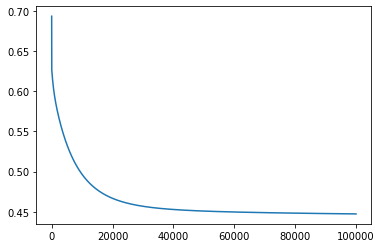

In [14]:
plt.plot(np.arange(iterations), cost_history)
plt.show()

In [23]:
print("Final weights: \n",W)

Final weights: 
 [[-0.78953722]
 [ 2.72427487]
 [-0.02403559]
 [-0.31826748]
 [-0.11886737]
 [ 0.00540861]
 [-0.06185678]]


In [24]:
print("Final bias: \n",B)

Final bias: 
 1.020014527549471


In [21]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    y_hat = sigmoid(Z)

    # Converting prediction into 0 or 1
    y_hat = y_hat > 0.5
    y_hat = np.array(y_hat, dtype = 'int64')
    
    print("\nPredicted output: \n",y_hat)
    print("\nActual output: \n",Y)
    acc = (1 - np.sum(np.absolute(y_hat - Y))/Y.shape[1])*100

    print("\n\nAccuracy of the model is : ", round(acc, 2), "%")

In [22]:
accuracy(X_test, Y_test, W, B)


Predicted output: 
 [[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0
  0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0
  1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0
  0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
  0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1
  0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0
  0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0
  1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0
  0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
  1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1
  0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1
  0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0]]

Actual output: 
 [[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0
  1 1 0 0 0 0 0 1 1 0 0 0